In [1]:
import numpy as np
import pandas as pd
from rulevetting.projects.tbi_pecarn.dataset import Dataset
from rulevetting.projects.tbi_pecarn.dataset import AgeSplit
from sklearn import metrics
pd.set_option("display.max_colwidth",1000)

/usr/local/lib/python3.9/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


# Read data

6 kidds of data (judgment calls)
age <=2, >2, invariant
include or exclude subvariables

In [2]:
df_train_old, df_tune_old, df_test_old = Dataset().get_data(split_age=AgeSplit.OLD,load_csvs=False)
df_train_old = df_train_old.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old = df_tune_old.drop(columns=['AgeinYears','Race','Gender'])
df_test_old = df_test_old.drop(columns=['AgeinYears','Race','Gender'])
X_train_old = df_train_old.drop(columns="outcome")
y_train_old = df_train_old["outcome"].values
X_tune_old = df_tune_old.drop(columns="outcome")
y_tune_old = df_tune_old["outcome"].values
X_test_old = df_test_old.drop(columns="outcome")
y_test_old = df_test_old["outcome"].values

df_train_young, df_tune_young, df_test_young = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False)
df_train_young = df_train_young.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young = df_tune_young.drop(columns=['AgeinYears','Race','Gender'])
df_test_young = df_test_young.drop(columns=['AgeinYears','Race','Gender'])
X_train_young = df_train_young.drop(columns="outcome")
y_train_young = df_train_young["outcome"].values
X_tune_young = df_tune_young.drop(columns="outcome")
y_tune_young = df_tune_young["outcome"].values
X_test_young = df_test_young.drop(columns="outcome")
y_test_young = df_test_young["outcome"].values

df_train_all, df_tune_all, df_test_all = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False)
df_train_all = df_train_all.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all = df_tune_all.drop(columns=['AgeinYears','Race','Gender'])
df_test_all = df_test_all.drop(columns=['AgeinYears','Race','Gender'])
X_train_all = df_train_all.drop(columns="outcome")
y_train_all = df_train_all["outcome"].values
X_tune_all = df_tune_all.drop(columns="outcome")
y_tune_all = df_tune_all["outcome"].values
X_test_all = df_test_all.drop(columns="outcome")
y_test_all = df_test_all["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 1, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': True, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3,

In [3]:
dset = Dataset()
# NOTE: This is just an example!
judg_calls = dset.get_judgement_calls_dictionary_default()
judg_calls["preprocess_data"]["step7_AMS"] = 1
judg_calls["preprocess_data"]["step8_OSI"] = 1
judg_calls["preprocess_data"]["step9_HEMA"] = 1
judg_calls["preprocess_data"]["step10_SFx"] = 1
judg_calls["preprocess_data"]["step11_SFxBas"] = 1
judg_calls["preprocess_data"]["step12_Clav"] = 1
judg_calls["preprocess_data"]["step13_NeuroD"] = 1
judg_calls["preprocess_data"]["step14_Vomit"] = 1
judg_calls["preprocess_data"]["step15_HA"] = 1
judg_calls["preprocess_data"]["step16_Seiz"] = 1
judg_calls["preprocess_data"]["step17_LOC"] = 1
judg_calls["extract_features"]["GCS"] = False

df_train_old_parent, df_tune_old_parent, df_test_old_parent = dset.get_data(split_age=AgeSplit.OLD,load_csvs=False, **judg_calls)
df_train_old_parent = df_train_old_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old_parent = df_tune_old_parent.drop(columns=['AgeinYears','Race','Gender'])
df_test_old_parent = df_test_old_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_old_parent = df_train_old_parent.drop(columns="outcome")
y_train_old_parent = df_train_old_parent["outcome"].values
X_tune_old_parent = df_tune_old_parent.drop(columns="outcome")
y_tune_old_parent = df_tune_old_parent["outcome"].values
X_test_old_parent = df_test_old_parent.drop(columns="outcome")
y_test_old_parent = df_test_old_parent["outcome"].values

df_train_young_parent, df_tune_young_parent, df_test_young_parent = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False, **judg_calls)
df_train_young_parent = df_train_young_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young_parent = df_tune_young_parent.drop(columns=['AgeinYears','Race','Gender'])
df_test_young_parent = df_test_young_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_young_parent = df_train_young_parent.drop(columns="outcome")
y_train_young_parent = df_train_young_parent["outcome"].values
X_tune_young_parent = df_tune_young_parent.drop(columns="outcome")
y_tune_young_parent = df_tune_young_parent["outcome"].values
X_test_young_parent = df_test_young_parent.drop(columns="outcome")
y_test_young_parent = df_test_young_parent["outcome"].values

df_train_all_parent, df_tune_all_parent, df_test_all_parent = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False, **judg_calls)
df_train_all_parent = df_train_all_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all_parent = df_tune_all_parent.drop(columns=['AgeinYears','Race','Gender'])
df_test_all_parent = df_test_all_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_all_parent = df_train_all_parent.drop(columns="outcome")
y_train_all_parent = df_train_all_parent["outcome"].values
X_tune_all_parent = df_tune_all_parent.drop(columns="outcome")
y_tune_all_parent = df_tune_all_parent["outcome"].values
X_test_all_parent = df_test_all_parent.drop(columns="outcome")
y_test_all_parent = df_test_all_parent["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1, 'step12_Clav': 1, 'step13_NeuroD': 1, 'step14_Vomit': 1, 'step15_HA': 1, 'step15_HAStart': False, 'step16_Seiz': 1, 'step16_SeizOccur': False, 'step17_LOC': 1, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': False, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1

In [4]:
def CV_rulefit_fit(X_train_ori, X_tune_ori, y_train_ori, y_tune_ori, text):
    
    # 4folds CV
    X_train_cand0 = X_train_ori.iloc[np.arange(0,len(y_train_ori),3),:]
    X_train_cand1 = X_train_ori.iloc[np.arange(1,len(y_train_ori),3),:]
    X_train_cand2 = X_train_ori.iloc[np.arange(2,len(y_train_ori),3),:]
    X_train_list = [X_tune_ori, X_train_cand0, X_train_cand1, X_train_cand2].copy()
    y_train_cand0 = y_train_ori[np.arange(0,len(y_train_ori),3)]
    y_train_cand1 = y_train_ori[np.arange(1,len(y_train_ori),3)]
    y_train_cand2 = y_train_ori[np.arange(2,len(y_train_ori),3)]
    y_train_list = [y_tune_ori, y_train_cand0, y_train_cand1, y_train_cand2].copy()
    
    # fit models
    for CVstep in range(4):
        X_train = X_train_list.copy()
        X_train.pop(CVstep)
        X_train = pd.concat(X_train)
        y_train = y_train_list.copy()
        y_train.pop(CVstep)
        y_train = np.concatenate(y_train)
        X_tune = X_train_list[CVstep]
        y_tune = y_train_list[CVstep]
        for NMaxRule in [5,10,15,20]:
            for RandomState in range(30):
                rulefit = imodels.RuleFitClassifier(max_rules=NMaxRule, random_state=RandomState)
                rulefit.fit(X_train, y_train, feature_names=feature_names)
                stats, threshes = predict_and_save(rulefit, 'rulefit_' + text + '_Nrule' + str(NMaxRule) + '_CVstep' + str(CVstep) + '_seed' + str(RandomState) ,
                                                   X_train, X_tune, y_train, y_tune,
                                                   MODELS_DIR = './models'+ '/Nrule' + str(NMaxRule)+'/CVstep' + str(CVstep) +'/rulefit_' + text + '/')



In [5]:
def CV_rulefit_eva(X_train_ori, X_tune_ori, y_train_ori, y_tune_ori, text):
    
    # 4folds CV
    X_train_cand0 = X_train_ori.iloc[np.arange(0,len(y_train_ori),3),:]
    X_train_cand1 = X_train_ori.iloc[np.arange(1,len(y_train_ori),3),:]
    X_train_cand2 = X_train_ori.iloc[np.arange(2,len(y_train_ori),3),:]
    X_train_list = [X_tune_ori, X_train_cand0, X_train_cand1, X_train_cand2].copy()
    y_train_cand0 = y_train_ori[np.arange(0,len(y_train_ori),3)]
    y_train_cand1 = y_train_ori[np.arange(1,len(y_train_ori),3)]
    y_train_cand2 = y_train_ori[np.arange(2,len(y_train_ori),3)]
    y_train_list = [y_tune_ori, y_train_cand0, y_train_cand1, y_train_cand2].copy()
    # evaluate for fitted models
    res = {}
    for NMaxRule in [5,10,15,20]:
        res[str(NMaxRule)] = []
    for CVstep in range(4):
        for NMaxRule in [5,10,15,20]:
            X_train = X_train_list.copy()
            X_train.pop(CVstep)
            X_train = pd.concat(X_train)
            y_train = y_train_list.copy()
            y_train.pop(CVstep)
            y_train = np.concatenate(y_train)
            X_tune = X_train_list[CVstep]
            y_tune = y_train_list[CVstep]
            suffixes = ['_train', '_tune']  # _train, _test1, _test2
            stats_list = {}
            for i, suffix in enumerate(suffixes):
                stats_list[suffix] = print_metrics(suffix, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'+ '/Nrule' + str(NMaxRule)+'/CVstep' + str(CVstep) +'/rulefit_' + text + '/')
            res[str(NMaxRule)].append(stats_list['_tune'].copy())
    pkl.dump(res, open(oj('./models/CV_rulefit_res/', text + '.pkl'), 'wb'))
    return(res)

In [6]:
def CVBest_rulefit(X_train_ori, X_tune_ori, y_train_ori, y_tune_ori, NMaxRule, RandomState):
    
    # fit for CVstep = 0, here tune data is the validation set
    CVstep = 0

    X_train_cand0 = X_train_ori.iloc[np.arange(0,len(y_train_ori),3),:]
    X_train_cand1 = X_train_ori.iloc[np.arange(1,len(y_train_ori),3),:]
    X_train_cand2 = X_train_ori.iloc[np.arange(2,len(y_train_ori),3),:]
    X_train_list = [X_tune_ori, X_train_cand0, X_train_cand1, X_train_cand2].copy()
    y_train_cand0 = y_train_ori[np.arange(0,len(y_train_ori),3)]
    y_train_cand1 = y_train_ori[np.arange(1,len(y_train_ori),3)]
    y_train_cand2 = y_train_ori[np.arange(2,len(y_train_ori),3)]
    y_train_list = [y_tune_ori, y_train_cand0, y_train_cand1, y_train_cand2].copy()

    X_train = X_train_list.copy()
    X_train.pop(CVstep)
    X_train = pd.concat(X_train)
    y_train = y_train_list.copy()
    y_train.pop(CVstep)
    y_train = np.concatenate(y_train)
    X_tune = X_train_list[CVstep]
    y_tune = y_train_list[CVstep]

    rulefit = imodels.RuleFitClassifier(max_rules=NMaxRule, random_state=RandomState)
    rulefit.fit(X_train, y_train, feature_names=list(X_train).copy())
    return(rulefit)

                


# Fit models

In [7]:
import os
import pickle as pkl
from os.path import join as oj

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

import numpy as np
import pandas as pd

import imodels
from rulevetting.api import validation


MODELS_DIR = './models'
os.makedirs(MODELS_DIR, exist_ok=True)

outcome_def = 'outcome'  # output

In [8]:
def predict_and_save(model, model_name, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    '''Plots cv and returns cv, saves all stats
    '''
    os.makedirs(MODELS_DIR, exist_ok=True)
    results = {'model': model}
    for x, y, suffix in zip([X_train, X_tune],
                            [y_train, y_tune],
                            ['_train', '_tune']):
        stats, threshes = validation.all_stats_curve(y, model.predict_proba(x)[:, 1],
                                                     plot=suffix == '_tune')
        for stat in stats.keys():
            results[stat + suffix] = stats[stat]
        results['threshes' + suffix] = threshes
    pkl.dump(results, open(oj(MODELS_DIR, model_name + '.pkl'), 'wb'))
    return stats, threshes

In [9]:
def print_metrics(suffix, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    os.makedirs(MODELS_DIR, exist_ok=True)
    vals = {s: [] for s in ['sens', 'spec', 'ppv', 'npv', 'lr+', 'lr-', 'brier_score', 'f1']}
    fnames = []
    for fname in sorted(os.listdir(MODELS_DIR)):
        if 'pkl' in fname:
            if not fname[:-4] == 'rf':
                r = pkl.load(open(oj(MODELS_DIR, fname), 'rb'))
                threshes = np.array(r['threshes' + suffix])
                m = r['model']

                # add more stats
                for x, y, suff in zip([X_train, X_tune],
                                      [y_train, y_tune],
                                      ['_train', '_tune']):
                    if suff == suffix:
                        stats, threshes = validation.all_stats_curve(y, m.predict_proba(x)[:, 1],
                                                                     plot=suffix == '_tune')
                        preds_proba = m.predict_proba(x)[:, 1]
                        brier_score = metrics.brier_score_loss(y, preds_proba)

                # pick best vals
                sens = np.array(r['sens' + suffix])
                spec = np.array(r['spec' + suffix])
                best_idx = np.argmax(5 * sens + spec)
                for k in vals.keys():
                    if not k == 'brier_score':
                        #                         print('k', k)
                        vals[k].append(stats[k][best_idx])
                vals['brier_score'].append(brier_score)
                fnames.append(fname[:-4])
    stats = pd.DataFrame.from_dict(vals)
    stats.index = fnames
    return (stats).round(2).transpose()



# Run rulefit and evaluation

In [ ]:
# the following codes require a long time to run. Comment them.

In [10]:
#CV_rulefit_fit(X_train_old, X_tune_old, y_train_old, y_tune_old, 'Old_IncSub')

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 453.73it/s]


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 492.40it/s]


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 491.42it/s]


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 892.60it/s]


100%|███████████████████████████████████████| 328/328 [00:00<00:00, 2080.72it/s]


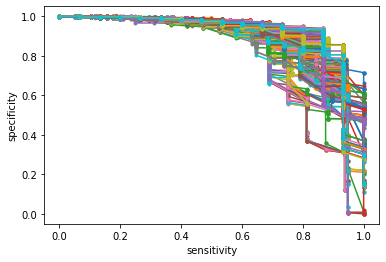

In [104]:
#CV_rulefit_fit(X_train_young, X_tune_young, y_train_young, y_tune_young, 'Young_IncSub')

100%|███████████████████████████████████████| 316/316 [00:00<00:00, 1362.61it/s]


100%|███████████████████████████████████████| 210/210 [00:00<00:00, 1348.46it/s]


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 543.44it/s]
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1164.11it/s]
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|███████████████████████████████████████| 340/340 [00:00<00:00, 1321.16it/s]


100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1172.58it/s]
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|███████████████████████████████████████| 349/349 [00:00<00:00, 1365.18it/s]
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


100%|███████████████████████████████████████| 239/239 [00:00<00:00, 1327.24it/s]


100%|███████████████████████████████████████| 268/268 [00:00<00:00, 1310.13it/s]


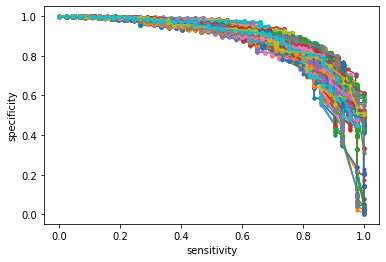

In [105]:
#CV_rulefit_fit(X_train_all, X_tune_all, y_train_all, y_tune_all, 'AgeInvariant_IncSub')

100%|███████████████████████████████████████| 110/110 [00:00<00:00, 2858.34it/s]


100%|███████████████████████████████████████| 123/123 [00:00<00:00, 2903.89it/s]


100%|███████████████████████████████████████| 130/130 [00:00<00:00, 2881.78it/s]


100%|█████████████████████████████████████████| 36/36 [00:00<00:00, 2681.30it/s]


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 627.70it/s]
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 651.80it/s]


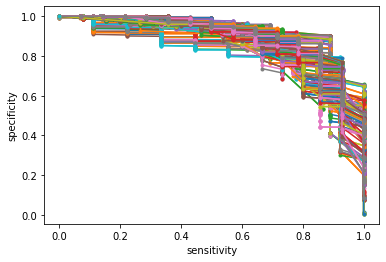

In [106]:
#CV_rulefit_fit(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, 'Old_ExcSub')

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 619.18it/s]


100%|███████████████████████████████████████| 102/102 [00:00<00:00, 2838.56it/s]


100%|█████████████████████████████████████████| 76/76 [00:00<00:00, 2781.95it/s]


100%|█████████████████████████████████████████| 64/64 [00:00<00:00, 2741.71it/s]


100%|███████████████████████████████████████| 118/118 [00:00<00:00, 2846.62it/s]


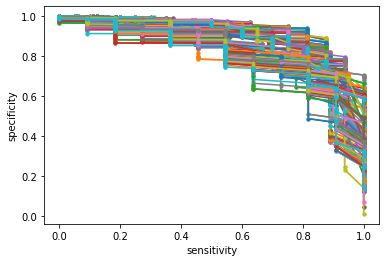

In [107]:
#CV_rulefit_fit(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, 'AgeInvariant_ExcSub')

100%|██████████████████████████████████████| 2379/2379 [00:02<00:00, 838.95it/s]


100%|███████████████████████████████████████| 220/220 [00:00<00:00, 1665.13it/s]


100%|████████████████████████████████████████| 714/714 [00:00<00:00, 882.23it/s]


100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 811.47it/s]


100%|█████████████████████████████████████| 1020/1020 [00:00<00:00, 1528.40it/s]


{'5': [             rulefit_Old_IncSub_Nrule5_CVstep0_seed0  \
  sens                                            0.09   
  spec                                            1.00   
  ppv                                             0.20   
  npv                                             1.00   
  lr+                                            47.50   
  lr-                                             0.91   
  brier_score                                     0.01   
  f1                                              0.12   
  
               rulefit_Old_IncSub_Nrule5_CVstep0_seed1  \
  sens                                            0.09   
  spec                                            1.00   
  ppv                                             0.17   
  npv                                             1.00   
  lr+                                            38.00   
  lr-                                             0.91   
  brier_score                                     0.01   
  f1  

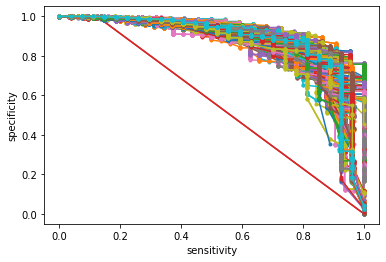

In [111]:
#CV_rulefit_eva(X_train_old, X_tune_old, y_train_old, y_tune_old, 'Old_IncSub')

100%|███████████████████████████████████████| 273/273 [00:00<00:00, 1316.05it/s]


100%|███████████████████████████████████████| 125/125 [00:00<00:00, 2163.56it/s]


100%|███████████████████████████████████████| 206/206 [00:00<00:00, 1297.64it/s]


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1183.20it/s]


100%|███████████████████████████████████████| 115/115 [00:00<00:00, 2136.56it/s]


{'5': [             rulefit_Young_IncSub_Nrule5_CVstep0_seed0  \
  sens                                              0.19   
  spec                                              1.00   
  ppv                                               0.25   
  npv                                               0.99   
  lr+                                              50.65   
  lr-                                               0.82   
  brier_score                                       0.01   
  f1                                                0.21   
  
               rulefit_Young_IncSub_Nrule5_CVstep0_seed1  \
  sens                                              0.19   
  spec                                              1.00   
  ppv                                               0.25   
  npv                                               0.99   
  lr+                                              50.65   
  lr-                                               0.82   
  brier_score                   

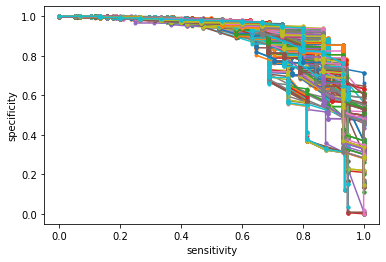

In [112]:
#CV_rulefit_eva(X_train_young, X_tune_young, y_train_young, y_tune_young, 'Young_IncSub')

100%|████████████████████████████████████████| 615/615 [00:01<00:00, 564.25it/s]


100%|███████████████████████████████████████| 177/177 [00:00<00:00, 1380.52it/s]


100%|████████████████████████████████████████| 711/711 [00:01<00:00, 603.99it/s]


100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 518.06it/s]


100%|███████████████████████████████████████| 300/300 [00:00<00:00, 1152.38it/s]


{'5': [             rulefit_AgeInvariant_IncSub_Nrule5_CVstep0_seed0  \
  sens                                                     0.13   
  spec                                                     1.00   
  ppv                                                      0.19   
  npv                                                      1.00   
  lr+                                                     39.54   
  lr-                                                      0.87   
  brier_score                                              0.01   
  f1                                                       0.15   
  
               rulefit_AgeInvariant_IncSub_Nrule5_CVstep0_seed1  \
  sens                                                     0.13   
  spec                                                     1.00   
  ppv                                                      0.18   
  npv                                                      1.00   
  lr+                                                 

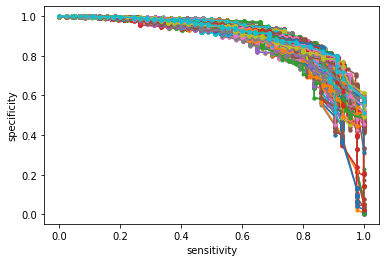

In [113]:
#CV_rulefit_eva(X_train_all, X_tune_all, y_train_all, y_tune_all, 'AgeInvariant_IncSub')

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 718.45it/s]


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 667.56it/s]


100%|█████████████████████████████████████████| 38/38 [00:00<00:00, 2150.05it/s]


100%|█████████████████████████████████████████| 46/46 [00:00<00:00, 2244.90it/s]


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 750.19it/s]


{'5': [             rulefit_Old_ExcSub_Nrule5_CVstep0_seed0  \
  sens                                            0.22   
  spec                                            0.95   
  ppv                                             0.07   
  npv                                             0.99   
  lr+                                             4.79   
  lr-                                             0.82   
  brier_score                                     0.01   
  f1                                              0.10   
  
               rulefit_Old_ExcSub_Nrule5_CVstep0_seed1  \
  sens                                            0.22   
  spec                                            0.95   
  ppv                                             0.07   
  npv                                             0.99   
  lr+                                             4.79   
  lr-                                             0.82   
  brier_score                                     0.01   
  f1  

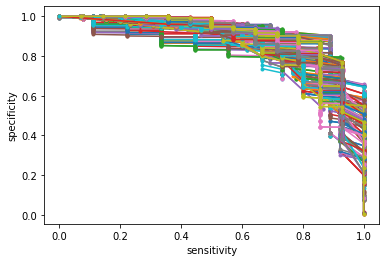

In [114]:
#CV_rulefit_eva(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, 'Old_ExcSub')

100%|███████████████████████████████████████| 152/152 [00:00<00:00, 2055.83it/s]


100%|█████████████████████████████████████████| 98/98 [00:00<00:00, 2709.28it/s]


100%|███████████████████████████████████████| 112/112 [00:00<00:00, 2143.96it/s]


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1638.24it/s]


100%|█████████████████████████████████████████| 73/73 [00:00<00:00, 2395.66it/s]


{'5': [             rulefit_AgeInvariant_ExcSub_Nrule5_CVstep0_seed0  \
  sens                                                     0.67   
  spec                                                     0.92   
  ppv                                                      0.10   
  npv                                                      1.00   
  lr+                                                      8.18   
  lr-                                                      0.36   
  brier_score                                              0.01   
  f1                                                       0.17   
  
               rulefit_AgeInvariant_ExcSub_Nrule5_CVstep0_seed1  \
  sens                                                     0.67   
  spec                                                     0.92   
  ppv                                                      0.10   
  npv                                                      1.00   
  lr+                                                 

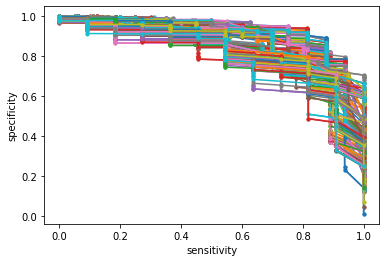

In [115]:
#CV_rulefit_eva(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, 'AgeInvariant_ExcSub')

## Pick the best one and test

In [27]:
def get_metrics(x, k = 5, cons = 0.5):
    if x[1] >= cons:
        return(k*x[0]+x[1])
    else:
        return(-1)

#### Old_IncSub

In [12]:
# pick Nmaxrule
text = 'Old_IncSub'
r = pkl.load(open(oj('./models/CV_rulefit_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxRule in [5,10,15,20]:
    res[str(NMaxRule)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxRule)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
        res[str(NMaxRule)] += np.array(res_metrics.copy()).max()/4
res

{'5': 1.6, '10': 4.067500000000001, '15': 5.5575, '20': 5.5525}

Pick NMaxRule=15. CVstep=0 as the result.

In [13]:
# check the seed
CVstep = 0
NMaxRule = 15
res_metrics = list()
for i in range(r['10'][1].shape[1]):
    res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
best_seed_loc = np.array(res_metrics.copy()).argmax()
r[str(NMaxRule)][CVstep].iloc[:,best_seed_loc].name

'rulefit_Old_IncSub_Nrule15_CVstep0_seed11'

In [14]:
rulefit = CVBest_rulefit(X_train_old, X_tune_old, y_train_old, y_tune_old, text, 15, 11)
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)

rules[['rule', 'coef', 'support','importance']].style.background_gradient(cmap='viridis')

,rule,coef,support,importance
136,LocLen_4 <= 0.5 and Vomit <= 0.5 and GCSEye > 0.5 and SFxPalpDepress_92 > 0.5,-0.953379,0.878809,0.311134
134,LocLen_3 <= 0.5 and GCSVerbal > 0.5 and SFxBasHem_1 <= 0.5,-1.259890,0.954760,0.261844
2,ActNorm,-0.669801,1.000000,0.224026
141,GCSMotor > 0.5 and ClavPar_1 <= 0.5,-0.510372,0.921379,0.137365
140,AMSSlow_1 <= 0.5 and SFxBasPer_0 <= 0.5,-0.660312,0.967091,0.117799
135,GCSEye > 0.5 and AMSSleep_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.419165,0.937559,0.101419
133,OSICut_1 <= 0.5 and GCSEye > 0.5 and SFxBasHem_1 <= 0.5,-0.554758,0.991753,0.050171
139,HemaSize_3 <= 0.5,-0.103698,0.931118,0.026262
138,AMSAgitated_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.167073,0.989790,0.016796
137,LocLen_4 <= 0.5 and GCSVerbal > 0.5 and SFxBasHem_1 <= 0.5,-0.127281,0.984056,0.015943


100%|███████████████████████████████████████| 163/163 [00:00<00:00, 1468.99it/s]


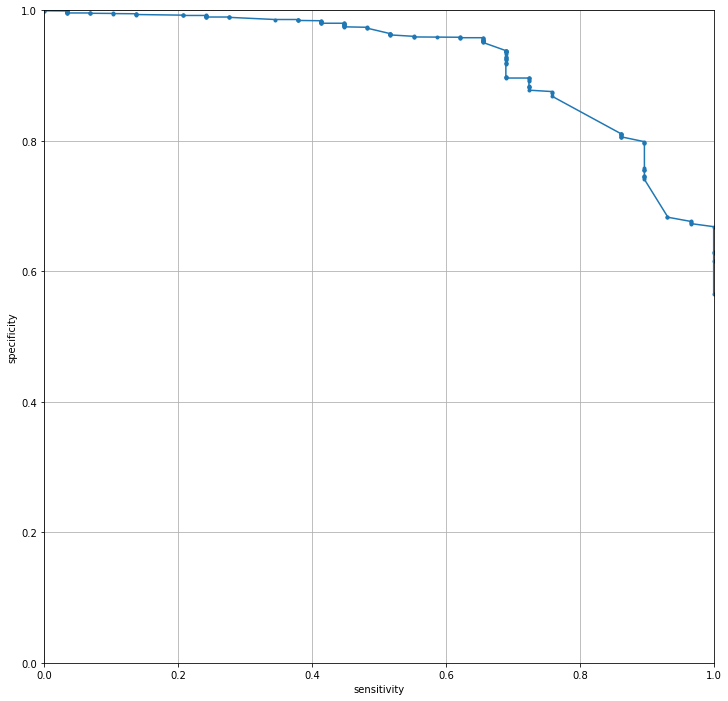

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
_ = validation.all_stats_curve(y_test_old, rulefit.predict_proba(X_test_old)[:, 1], plot=True)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

#### Young_IncSub

In [127]:
text = 'Young_IncSub'
r = pkl.load(open(oj('./models/CV_rulefit_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxRule in [5,10,15,20]:
    res[str(NMaxRule)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxRule)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
        res[str(NMaxRule)] += np.array(res_metrics.copy()).max()/4
res

{'5': 1.92, '10': 5.2975, '15': 5.452500000000001, '20': 5.477499999999999}

Pick NMaxRule=10. CVstep=0 as the result.

In [128]:
CVstep = 0
NMaxRule = 10
res_metrics = list()
for i in range(r['10'][1].shape[1]):
    res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
best_seed_loc = np.array(res_metrics.copy()).argmax()
r[str(NMaxRule)][CVstep].iloc[:,best_seed_loc].name

'rulefit_Young_IncSub_Nrule10_CVstep0_seed7'

In [129]:
rulefit = CVBest_rulefit(X_train_young, X_tune_young, y_train_young, y_tune_young, text, 10, 7)
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)

rules[['rule', 'coef', 'support','importance']].style.background_gradient(cmap='viridis')

,rule,coef,support,importance
129,LocLen_4 <= 0.5 and SFxPalpDepress_1 <= 0.5 and HemaLoc_3 <= 0.5,-0.989404,0.900901,0.295629
126,SeizLen_3 <= 0.5 and AMSAgitated_1 <= 0.5 and GCSEye > 0.5 and SFxPalpDepress_1 <= 0.5 and ClavOcc_1 <= 0.5,-0.638725,0.893971,0.196648
132,SFxPalpDepress_92 > 0.5 and SFxBasRet_0 <= 0.5 and HemaSize_3 <= 0.5,-0.621942,0.924879,0.163936
128,SeizLen_4 <= 0.5 and SFxBasRhi_0 <= 0.5 and SFxPalp <= 0.5,-0.797635,0.966459,0.143610
130,AMSSleep_0 <= 0.5 and ClavOcc_1 <= 0.5,-0.286744,0.871933,0.095819
123,Vomit <= 0.5 and AMSSlow_1 <= 0.5 and SFxPalpDepress_92 > 0.5 and GCSVerbal > 0.5,-0.252495,0.828829,0.095104
127,SeizLen_3 <= 0.5 and SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5 and GCSVerbal > 0.5,-0.439762,0.964241,0.081659
131,GCSEye > 0.5 and GCSVerbal > 0.5,-0.373027,0.969369,0.064278
22,LocLen_92,-0.239176,1.000000,0.050965
36,AMSSlow_92,-0.124575,1.000000,0.037453


100%|███████████████████████████████████████| 102/102 [00:00<00:00, 1676.31it/s]


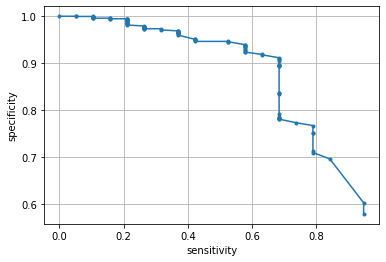

In [130]:
_ = validation.all_stats_curve(y_test_young, rulefit.predict_proba(X_test_young)[:, 1], plot=True)


In [123]:
sum(y_test_young)

19

#### AgeInvariant_IncSub

In [131]:
text = 'AgeInvariant_IncSub'
r = pkl.load(open(oj('./models/CV_rulefit_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxRule in [5,10,15,20]:
    res[str(NMaxRule)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxRule)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
        res[str(NMaxRule)] += np.array(res_metrics.copy()).max()/4
res

{'5': 1.9549999999999998, '10': 1.9800000000000002, '15': 5.5125, '20': 5.5225}

Pick NMaxRule=15. CVstep=0 as the result.

In [132]:
CVstep = 0
NMaxRule = 15
res_metrics = list()
for i in range(r['10'][1].shape[1]):
    res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
best_seed_loc = np.array(res_metrics.copy()).argmax()
r[str(NMaxRule)][CVstep].iloc[:,best_seed_loc].name

'rulefit_AgeInvariant_IncSub_Nrule15_CVstep0_seed23'

In [133]:
rulefit = CVBest_rulefit(X_train_all, X_tune_all, y_train_all, y_tune_all, text, 15, 23)
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)

rules[['rule', 'coef', 'support','importance']].style.background_gradient(cmap='viridis')

,rule,coef,support,importance
127,AMSOth_0 <= 0.5,-0.993656,0.914574,0.277742
124,Vomit <= 0.5 and SFxBasHem_1 <= 0.5,-0.601918,0.873966,0.199769
123,High_impact_InjSev_3 <= 0.5 and LocLen_4 <= 0.5 and SFxPalpDepress_0 <= 0.5 and NeuroDCranial_1 <= 0.5,-0.526590,0.855668,0.185058
121,OSIAbdomen_1 <= 0.5 and HemaLoc_3 <= 0.5,-0.558559,0.897779,0.169209
119,AMSOth_1 <= 0.5 and SFxBasHem_1 <= 0.5 and HemaSize_3 <= 0.5,-0.541056,0.915727,0.150304
18,LocLen_92,-0.391449,1.000000,0.117573
2,ActNorm,-0.296187,1.000000,0.098651
38,AMSOth_92,-0.219569,1.000000,0.065860
125,SFxPalpDepress_92 > 0.5 and SFxBasPer_0 <= 0.5,-0.641207,0.992781,0.054283
129,OSIOth_1 <= 0.5 and SeizLen_2 <= 0.5 and SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5 and SFxBasOto_1 <= 0.5,-0.230229,0.974683,0.036166


100%|███████████████████████████████████████| 329/329 [00:00<00:00, 1265.31it/s]


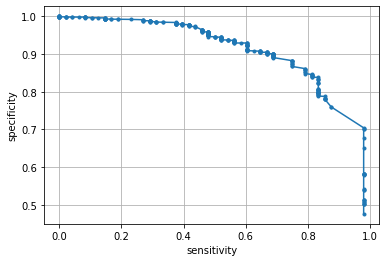

In [134]:
_ = validation.all_stats_curve(y_test_all, rulefit.predict_proba(X_test_all)[:, 1], plot=True)


#### Old_ExcSub

In [141]:
text = 'Old_ExcSub'
r = pkl.load(open(oj('./models/CV_rulefit_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxRule in [5,10,15,20]:
    res[str(NMaxRule)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxRule)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
        res[str(NMaxRule)] += np.array(res_metrics.copy()).max()/4
res

{'5': 3.4275, '10': 5.452500000000001, '15': 5.5625, '20': 5.5725}

Pick NMaxRule=10. CVstep=0 as the result.

In [142]:
CVstep = 0
NMaxRule = 10
res_metrics = list()
for i in range(r['10'][1].shape[1]):
    res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
best_seed_loc = np.array(res_metrics.copy()).argmax()
r[str(NMaxRule)][CVstep].iloc[:,best_seed_loc].name

'rulefit_Old_ExcSub_Nrule10_CVstep0_seed0'

In [144]:
rulefit = CVBest_rulefit(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, text, 10,0)
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)

rules[['rule', 'coef', 'support','importance']].style.background_gradient(cmap='viridis')

,rule,coef,support,importance
26,Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5,-1.085289,0.944262,0.248981
22,Seiz <= 0.5 and AMS <= 0.5,-0.594220,0.834973,0.220577
19,Vomit <= 0.5,-0.695776,0.932787,0.174216
24,Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5,-0.524504,0.927869,0.135692
25,SFxBas <= 0.5 and Hema <= 0.5,-0.230287,0.682514,0.107198
27,Vomit <= 0.5 and SFxBas <= 0.5,-0.392818,0.925683,0.103031
21,LOCSeparate <= 0.5,-0.201793,0.677049,0.094359
23,SFxBas <= 0.5,-0.269510,0.991257,0.025090
28,Seiz <= 0.5 and SFxBas <= 0.5,-0.061523,0.983607,0.007812
20,GCSTotal > 0.5 and SFxBas <= 0.5,-0.004798,0.951913,0.001027


100%|█████████████████████████████████████████| 43/43 [00:00<00:00, 1652.63it/s]


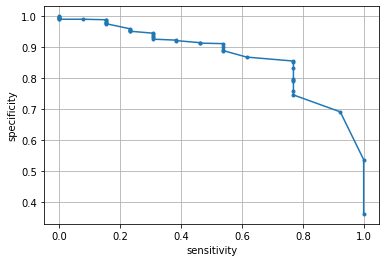

In [145]:
_ = validation.all_stats_curve(y_test_old_parent, rulefit.predict_proba(X_test_old_parent)[:, 1], plot=True)


#### AgeInvariant_ExcSub

In [28]:
text = 'AgeInvariant_ExcSub'
r = pkl.load(open(oj('./models/CV_rulefit_res/', text + '.pkl'), 'rb'))

res = {}

for NMaxRule in [5,10,15,20]:
    res[str(NMaxRule)] = 0
    for CVstep in range(4):
        res_metrics = list()
        for i in range(r[str(NMaxRule)][CVstep].shape[1]):
            res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
        res[str(NMaxRule)] += np.array(res_metrics.copy()).max()/4
res

{'5': 3.6525000000000003, '10': 4.79, '15': 5.445, '20': 5.5025}

Pick NMaxRule=15. CVstep=0 as the result.

In [29]:
CVstep = 0
NMaxRule = 15
res_metrics = list()
for i in range(r['10'][1].shape[1]):
    res_metrics.append(get_metrics(r[str(NMaxRule)][CVstep].iloc[:2,i]))
best_seed_loc = np.array(res_metrics.copy()).argmax()
r[str(NMaxRule)][CVstep].iloc[:,best_seed_loc].name

'rulefit_AgeInvariant_ExcSub_Nrule15_CVstep0_seed15'

In [32]:
rulefit = CVBest_rulefit(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent,  15, 15)
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("importance", ascending=False)

rules[['rule', 'coef', 'support','importance']]

,rule,coef,support,importance
18,AMS <= 0.5,-1.137358,0.836585,0.420531
21,Vomit <= 0.5,-1.005745,0.929756,0.257026
15,LOCSeparate <= 0.5,-0.455918,0.703415,0.208241
20,High_impact_InjSev_1 <= 0.5 and SFxPalp <= 0.5 and SFxBas <= 0.5,-0.395714,0.915610,0.109997
17,SFxBas <= 0.5 and Hema <= 0.5,-0.209406,0.678537,0.097801
14,Seiz <= 0.5 and Hema <= 0.5,-0.177269,0.678537,0.082791
19,Seiz <= 0.5 and SFxBas <= 0.5,-0.404759,0.982439,0.053165
22,Seiz <= 0.5 and SFxBas <= 0.5,-0.390322,0.982439,0.051268
16,ActNorm > 0.5 and SFxPalp <= 0.5 and SFxBas <= 0.5,-0.055102,0.841463,0.020126


100%|█████████████████████████████████████████| 55/55 [00:00<00:00, 1734.76it/s]


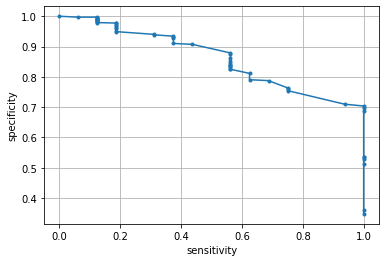

In [154]:
_ = validation.all_stats_curve(y_test_all_parent, rulefit.predict_proba(X_test_all_parent)[:, 1], plot=True)


## Combine ROC together

100%|█████████████████████████████████████████| 55/55 [00:00<00:00, 2144.25it/s]


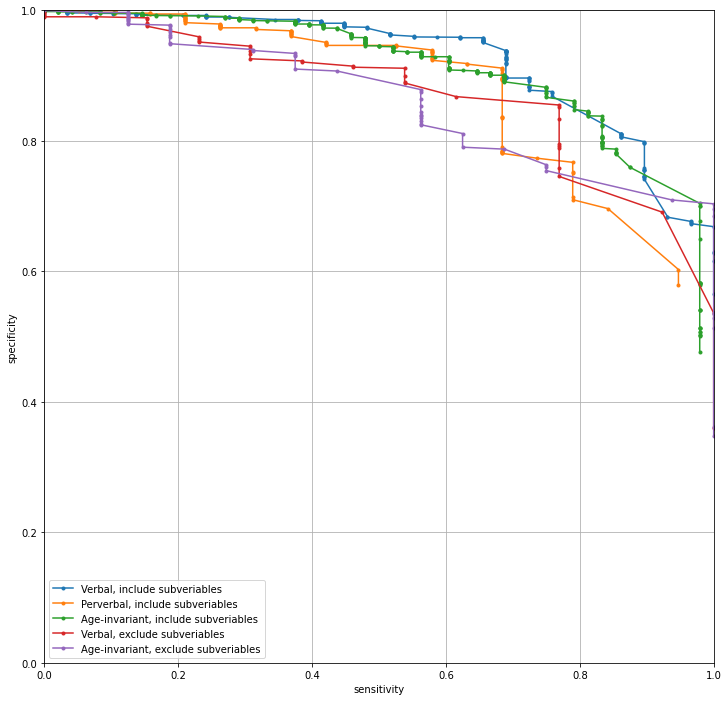

In [23]:
# Use ROC to get best classifiers
fig, ax = plt.subplots(figsize=(12, 12))
rulefit_old = CVBest_rulefit(X_train_old, X_tune_old, y_train_old, y_tune_old, 15, 11)
_ = validation.all_stats_curve(y_test_old, rulefit_old.predict_proba(X_test_old)[:, 1], plot=True)
rulefit_young = CVBest_rulefit(X_train_young, X_tune_young, y_train_young, y_tune_young, 10, 7)
_ = validation.all_stats_curve(y_test_young, rulefit_young.predict_proba(X_test_young)[:, 1], plot=True)
rulefit_all = CVBest_rulefit(X_train_all, X_tune_all, y_train_all, y_tune_all,15, 23)
_ = validation.all_stats_curve(y_test_all, rulefit_all.predict_proba(X_test_all)[:, 1], plot=True)
rulefit_old_parent = CVBest_rulefit(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, 10,0)
_ = validation.all_stats_curve(y_test_old_parent, rulefit_old_parent.predict_proba(X_test_old_parent)[:, 1], plot=True)
rulefit_all_parent = CVBest_rulefit(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, 15, 15)
_ = validation.all_stats_curve(y_test_all_parent, rulefit_all_parent.predict_proba(X_test_all_parent)[:, 1], plot=True)


plt.xlim([0,1])
plt.ylim([0,1])
ax.legend(['Verbal, include subveriables','Perverbal, include subveriables','Age-invariant, include subveriables','Verbal, exclude subveriables','Age-invariant, exclude subveriables'])
plt.show()

100%|███████████████████████████████████████| 329/329 [00:00<00:00, 1247.83it/s]


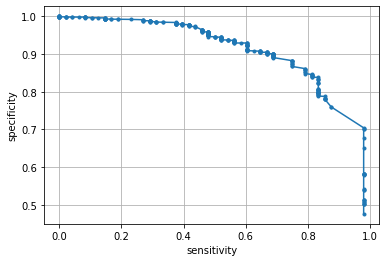

In [13]:
rulefit_all = CVBest_rulefit(X_train_all, X_tune_all, y_train_all, y_tune_all, 15, 23)
_ = validation.all_stats_curve(y_test_all, rulefit_all.predict_proba(X_test_all)[:, 1], plot=True)


### Put Andrej's ROC together

In [13]:
rulefit_basic_stats = pkl.load(open(oj('./rulevetting/projects/tbi_pecarn/notebooks/models/basic_stats.pkl'), 'rb'))
rulefit_maxim_stats = pkl.load(open(oj('./rulevetting/projects/tbi_pecarn/notebooks/models/maxim_stats.pkl'), 'rb'))

100%|█████████████████████████████████████████| 55/55 [00:00<00:00, 2732.25it/s]


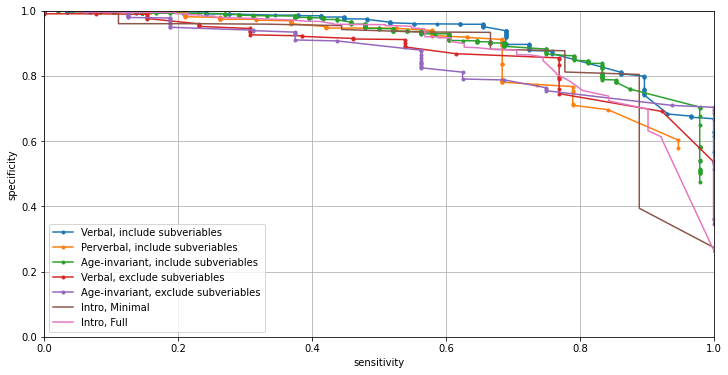

In [25]:
# Use ROC to get best classifiers
fig, ax = plt.subplots(figsize=(12, 6))
rulefit_old = CVBest_rulefit(X_train_old, X_tune_old, y_train_old, y_tune_old, 15, 11)
_ = validation.all_stats_curve(y_test_old, rulefit_old.predict_proba(X_test_old)[:, 1], plot=True)
rulefit_young = CVBest_rulefit(X_train_young, X_tune_young, y_train_young, y_tune_young, 10, 7)
_ = validation.all_stats_curve(y_test_young, rulefit_young.predict_proba(X_test_young)[:, 1], plot=True)
rulefit_all = CVBest_rulefit(X_train_all, X_tune_all, y_train_all, y_tune_all,15, 23)
_ = validation.all_stats_curve(y_test_all, rulefit_all.predict_proba(X_test_all)[:, 1], plot=True)
rulefit_old_parent = CVBest_rulefit(X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, 10,0)
_ = validation.all_stats_curve(y_test_old_parent, rulefit_old_parent.predict_proba(X_test_old_parent)[:, 1], plot=True)
rulefit_all_parent = CVBest_rulefit(X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, 15, 15)
_ = validation.all_stats_curve(y_test_all_parent, rulefit_all_parent.predict_proba(X_test_all_parent)[:, 1], plot=True)
rulefit_basic_stats = pkl.load(open(oj('./rulevetting/projects/tbi_pecarn/notebooks/models/basic_stats.pkl'), 'rb'))
rulefit_maxim_stats = pkl.load(open(oj('./rulevetting/projects/tbi_pecarn/notebooks/models/maxim_stats.pkl'), 'rb'))

plt.plot(rulefit_basic_stats['sens'], rulefit_basic_stats['spec'],'-')
plt.plot(rulefit_maxim_stats['sens'], rulefit_maxim_stats['spec'],'-')
plt.xlim([0,1])
plt.ylim([0,1])
ax.legend(['Verbal, include subveriables','Perverbal, include subveriables','Age-invariant, include subveriables','Verbal, exclude subveriables','Age-invariant, exclude subveriables', 'Intro, Minimal', 'Intro, Full'])
plt.show()

## Pick Threshold

In [21]:
rulefit_all.predict_proba(X_test_all)[:, 1] > 1.3e-05

array([False,  True, False, ..., False, False,  True])

In [23]:
y_test_all[y_test_all==1].shape

(48,)

In [25]:
y_test_all[(y_test_all==1)&(rulefit_all.predict_proba(X_test_all)[:, 1] > 1.3e-05)].shape

(47,)

In [26]:
y_test_all[y_test_all==0].shape

(6601,)

In [27]:
y_test_all[(y_test_all==0)&(rulefit_all.predict_proba(X_test_all)[:, 1] < 1.3e-05)].shape

(4649,)

In [30]:
df_final = pd.concat(Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False))

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 1, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': True, 'remove_constVal': True}}


In [31]:
df_final = df_final.drop(columns=['AgeinYears','Race','Gender'])
X_final = df_final.drop(columns="outcome")
y_final = df_final["outcome"].values


In [32]:
y_final[y_final==1].shape

(221,)

In [42]:
y_final[(y_final==1)&(rulefit_all.predict_proba(X_final)[:, 1] > 1.3e-05)].shape

(207,)

In [37]:
y_final[y_final==0].shape

(33024,)

In [41]:
y_final[(y_final==0)&(rulefit_all.predict_proba(X_final)[:, 1] < 1.3e-05)].shape

(23519,)

### save model

In [46]:
pkl.dump(rulefit_all, open(oj('./rulevetting/projects/tbi_pecarn/best_model.pkl'), 'wb'))

In [47]:
rulefit_res = pkl.load(open(oj('./rulevetting/projects/tbi_pecarn/best_model.pkl'), 'rb'))

In [48]:
print(rulefit_res)

RuleFit:
                                                                                                          rule  coef
                                                                                                       ActNorm -0.30
                                                                                                     LocLen_92 -0.39
                                                                                                     AMSOth_92 -0.22
                                     SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5 and NeuroDCranial_1 <= 0.5 -0.31
                                                                SFxPalpDepress_92 > 0.5 and SFxBasPer_0 <= 0.5 -0.64
      OSICut_1 <= 0.5 and LocLen_4 <= 0.5 and SeizLen_4 <= 0.5 and SFxBasHem_1 <= 0.5 and NeuroDMotor_1 <= 0.5 -0.12
                                                                            OSICut_1 <= 0.5 and SFxPalp <= 0.5 -0.10
                                                       

In [49]:
rulefit_all.predict_proba(X_final)

array([[9.99964181e-01, 3.58188773e-05],
       [9.99996028e-01, 3.97202784e-06],
       [9.99996028e-01, 3.97202784e-06],
       ...,
       [9.99996028e-01, 3.97202784e-06],
       [9.99996028e-01, 3.97202784e-06],
       [9.99975088e-01, 2.49116037e-05]])

In [51]:
rulefit_all.get_rules()

,rule,type,coef,support,importance
0,LOCSeparate,linear,0.000000,1.000000,0.000000
1,Seiz,linear,0.000000,1.000000,0.000000
2,ActNorm,linear,-0.296187,1.000000,0.098651
3,Vomit,linear,0.000000,1.000000,0.000000
4,AMS,linear,0.000000,1.000000,0.000000
...,...,...,...,...,...
127,AMSOth_0 <= 0.5,rule,-0.993656,0.914574,0.277742
128,OSICut_1 <= 0.5 and LocLen_4 <= 0.5 and SeizLen_4 <= 0.5 and SFxBasHem_1 <= 0.5 and NeuroDMotor_1 <= 0.5,rule,-0.120065,0.989372,0.012312
129,OSIOth_1 <= 0.5 and SeizLen_2 <= 0.5 and SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5 and SFxBasOto_1 <= 0.5,rule,-0.230229,0.974683,0.036166
130,ClavPar_1 <= 0.5,rule,-0.061043,0.926054,0.015974
